# Haberman Dataset - Exploratory Data Analysis

Data Description:- The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

No of Observations:-306
No of Atrributes:-4

Attribute Information:
    1)Age of Patient at the time of operation(Numeric)
    2)Patient's year of operation(Year 1900- Numerical)
    3)Number of positive axillary nodes detected (Numerical)
    4)Survival status:-
           (class attribute) 1 = The patient survived 5 years or longer
           (class attribute) 2 = The patient died within 5 year

Domain Knowledge:-
As axillary lymph nodes are near the breasts, they are often the first location to which breast cancer spreads if it moves beyond the breast tissue.The number of axillary lymph nodes can vary from person to person, ranging from five nodes to more than 30.After a breast cancer diagnosis, a doctor will often check whether cancer cells have spread to the axillary lymph nodes. This can help confirm the diagnosis and staging of the cancer.

Objective:-
    The objective is to understand the dataset with the help of exploratory data analysis & classify persons who servived after surgery from the person who died after surgery according to patients age, no of axillary nodes & year of treatment.

haberman Dataset:-
    https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1
reference links:-
    https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival
    https://www.medicalnewstoday.com/articles/319713.php#what-is-the-connection
    https://www.kaggle.com/vj1998/haberman-s-survival-exploratory-data-analysis

In [3]:
#importting necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
#Loading data set:
df=pd.read_csv(r'C:\Users\kaushiki\Documents\ML Course\Assignments\Module2\haberman.csv')
#print(df)
print(df.shape)
print(df.columns)

(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [9]:
#To get count of patients who survied after surgery & who died after surgery
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

Observations:- Out of 306 patients, 225 patients survied for 5 years or longer while 81 patients died within 5 years after surgery.

2-D Scatter Plot

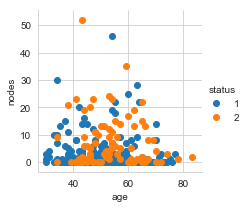

In [6]:
#2-D Scatter plot with color-coding according to status
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='status',height=3).map(plt.scatter,'age','nodes').add_legend();
plt.show();

Observations:-
1)  Most of patients have 0-10 axillary nodes and patients with axillary nodes greater than 30 are very less.
2)  Data points representing patients who survied after surgery & who died after surgery (using ages & nodes) are overlapping       with each other so it is not possible to distinguish them from each other using 2D scatter plot.

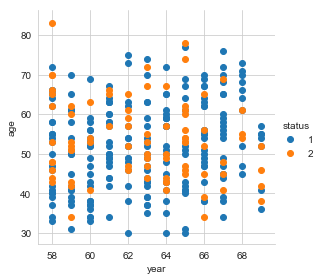

In [13]:
#2D scatter plot (Year Vs Age)
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='status',height=4).map(plt.scatter,'year','age').add_legend();
plt.plot();

Observations:-Still overlapping of data points observed so classification is not possible.

Pair Plot for better visualisation

C:\Users\kaushiki\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


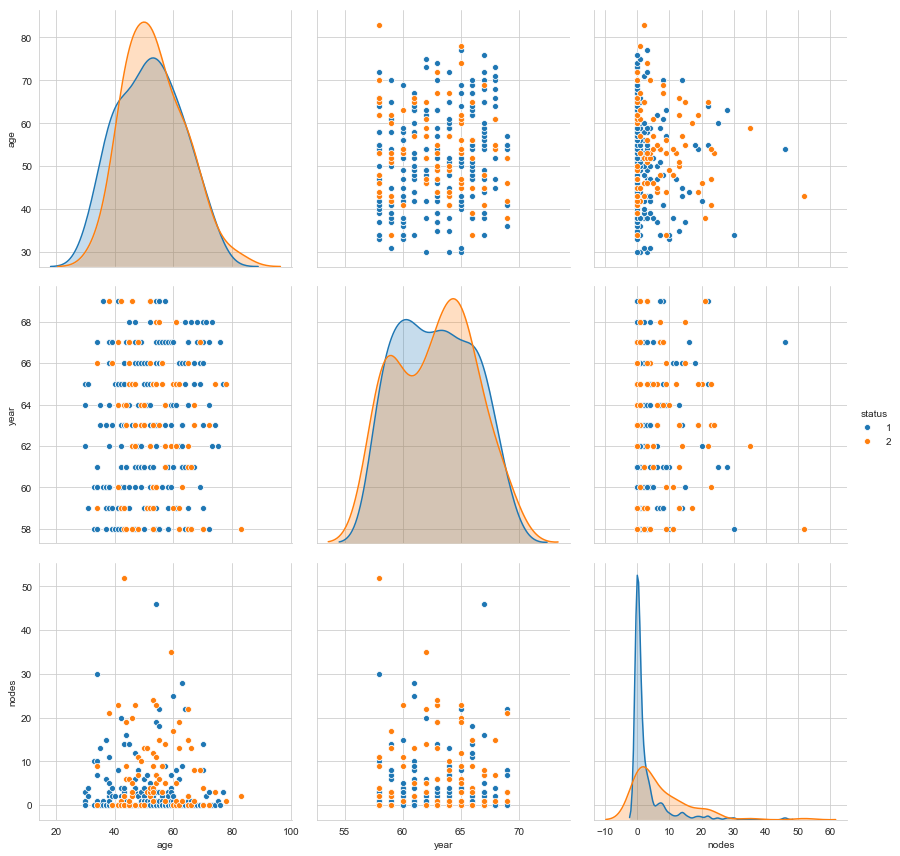

In [8]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="status", vars=['age', 'year', 'nodes'],height=4);
plt.show();

Observations:
    1) Most of patients have 0-10 axillary nodes and patients with axillary nodes greater than 30 are very less.
    2) at year 1961, max patients servied after surgery & at year 1965 max patients died after surgery.
    3) Most of patients are lies between age group 40 to 60.

Univariate Analysis

C:\Users\kaushiki\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


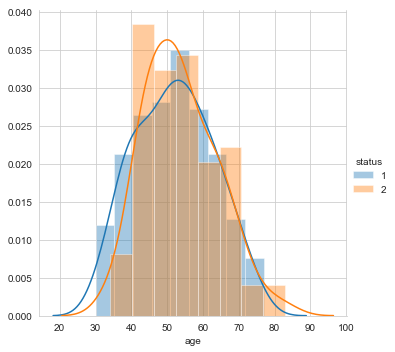

In [17]:
#PDF for age
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "age").add_legend();
plt.show();

C:\Users\kaushiki\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


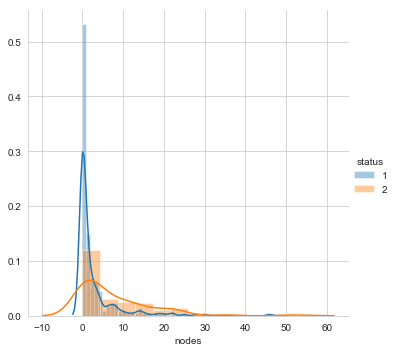

In [18]:
#pdf for nodes
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "nodes").add_legend();
plt.show();

C:\Users\kaushiki\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


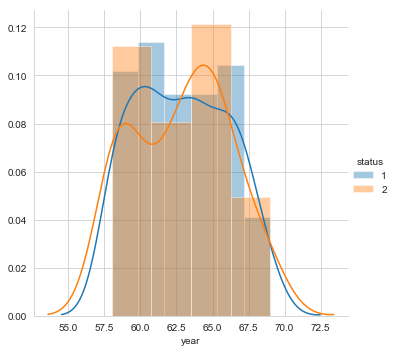

In [19]:
#pdf for year
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "year").add_legend();
plt.show();

Cumulative Distribution Function

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


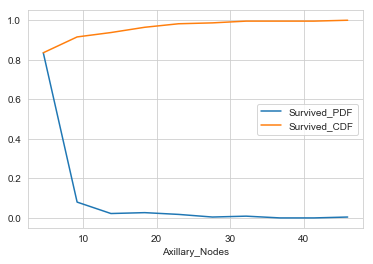

In [26]:
#CDF for nodes
#To plot CDF we need to divide servied people & people who died after surgery
Survived_P=df.loc[df["status"]==1]
Died_P=df.loc[df["status"]==2]
counts, bin_edges = np.histogram(Survived_P['nodes'],bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend('survivalstatus')
plt.legend(['Survived_PDF', 'Survived_CDF'])
plt.xlabel("Axillary_Nodes")
plt.show();

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


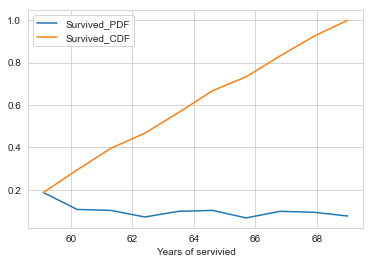

In [23]:
#Cdf for year
counts, bin_edges = np.histogram(Survived_P['year'],bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend('survivalstatus')
plt.legend(['Survived_PDF', 'Survived_CDF'])
plt.xlabel("Years of servivied")
plt.show();

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


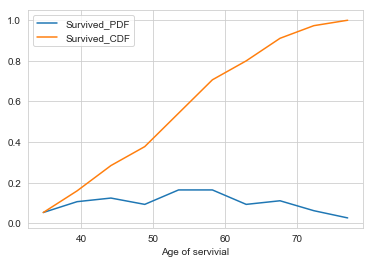

In [24]:
#Cdf for age
counts, bin_edges = np.histogram(Survived_P['age'],bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend('survivalstatus')
plt.legend(['Survived_PDF', 'Survived_CDF'])
plt.xlabel("Age of servivial")
plt.show();

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


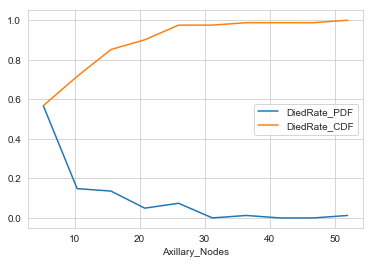

In [35]:
counts, bin_edges = np.histogram(Died_P['nodes'],bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend('survivalstatus')
plt.legend(['DiedRate_PDF', 'DiedRate_CDF'])
plt.xlabel("Axillary_Nodes")
plt.show();

Observations:-
1) 83% of patients who survied have axillary nodes less than 5.
2) 98% of patients who died after surgary have axillay nodes less than 25

Box Plot and Whiskers Graphs

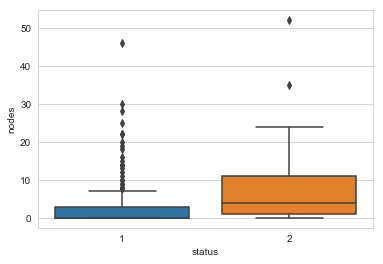

In [27]:
#Boxplot for nodes
sns.boxplot(x='status',y='nodes', data=df)
plt.show()

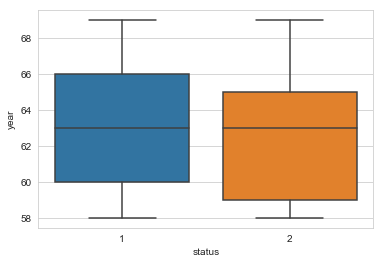

In [36]:
#Boxplot for years
sns.boxplot(x='status',y='year', data=df)
plt.show()

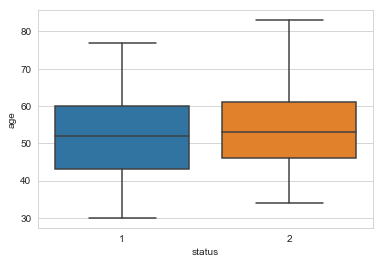

In [37]:
#Boxplot for ages
sns.boxplot(x='status',y='age', data=df)
plt.show()

Observations:-
1) axillary nodes for patients who survied after sugery is highly densed from 0 to 3 also 25th & 50th percentile values are overlapped with each other only 75th percentile value lies on node = 3.
2) axillary nodes for patients who died after sugary is highly dense from 4 to 11 also 25th percentile value lies on node = 1
3) patients who treated below 1959 have less chance of survival while patients who treated after year 1966 have high chance of survival.
4) patients below age of 43 have high chance of survival while patients with age above 60 have less chance of servival.

Violin Plots

C:\Users\kaushiki\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


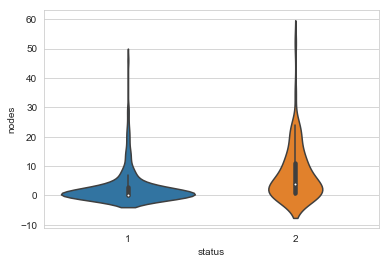

In [30]:
#Violine plots for nodes
sns.violinplot(x="status", y="nodes", data=df, size=8)
plt.show()

C:\Users\kaushiki\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


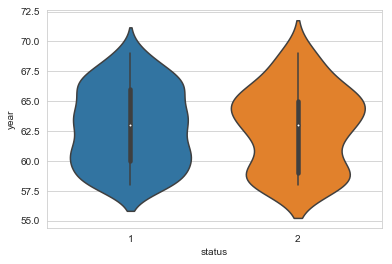

In [31]:
#Violine plots for years
sns.violinplot(x="status", y="year", data=df, size=8)
plt.show()

C:\Users\kaushiki\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


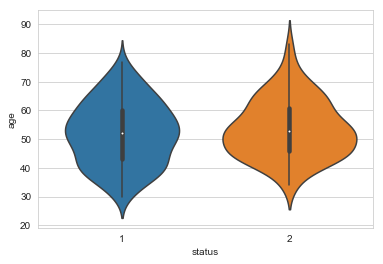

In [32]:
#Violine plots for age
sns.violinplot(x="status", y="age", data=df, size=8)
plt.show()

Final Conclusion:-
No of axillary node plays important role in predecting chances of survival of patient after surgary.so according to graphical visualisation we can say that if no of axillary nodes are less then there is high chance of patients to survive.